In [2]:
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
import numpy as np

In [3]:
import seaborn as sns
import pylab
sns.set(font_scale=3)
import math
pylab.rcParams['figure.figsize'] = (24, 18)

In [4]:
import quandl as q
token="Us3wFmXGgAj_1cUtHAAR"

In [5]:
import quandl as q
token="Us3wFmXGgAj_1cUtHAAR"
def calc_risk_parity(vol=.1,lookback=36):
    df=pd.DataFrame()
    df['SP500']=q.get("CHRIS/CME_SP1", authtoken=token).resample(rule='m').last().Last
    df['US10Y']=q.get("CHRIS/CME_US1", authtoken=token).resample(rule='m').last().Last
    data_pct=df.pct_change()
    rtns=((data_pct/pd.DataFrame.ewm(data_pct,lookback,min_periods=lookback/3.).std())*(vol/math.sqrt(12))).dropna()
    mat=pd.DataFrame.ewm(data_pct,lookback,min_periods=lookback/3.).corr().dropna()
    sf=pd.Series()
    for d,dd in mat.groupby(level=0):
        sf[d]=1/math.sqrt(dd.mean().mean())
    return rtns.multiply(sf,axis=0).dropna().mean(axis=1)

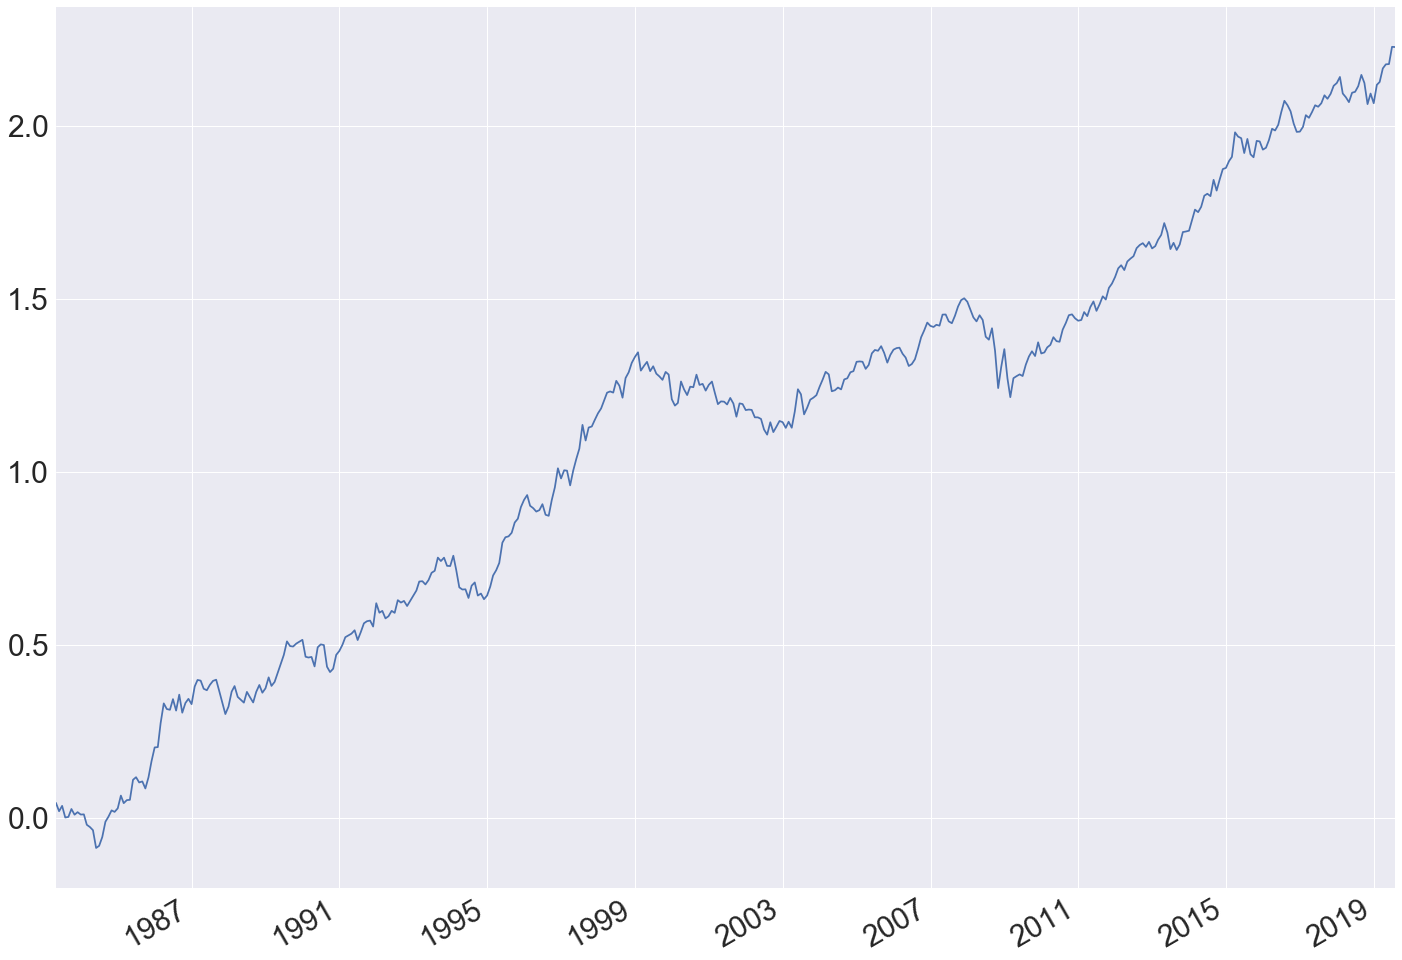

In [6]:
calc_risk_parity().cumsum().plot()